**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

 

**Why Do We Need Feature Selection?**

*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.

**Types of Feature Selection Methods**

<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.

<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.

<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Step 1: Create a sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Size': np.random.randint(1000, 5000, size=100),  # square feet
    'Bedrooms': np.random.randint(1, 5, size=100),    # number of bedrooms
    'Age': np.random.randint(1, 50, size=100),        # age of the house 
    'Price': np.random.randint(100000, 500000, size=100)  # House price
})

In [7]:
df.head()

,Size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


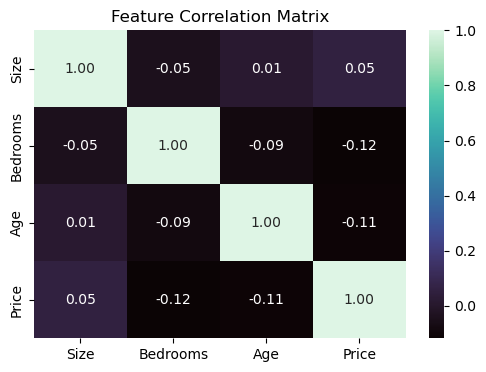

In [13]:
#step 2: compute correlation(filter method)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='mako',fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()
#Compute correlation to see how features relate to the target

In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Step 3: Apply Recursive Feature Elimination (RFE)
X = df.drop(columns=['Price'])  # Features (size, bedrooms, age)
y = df['Price']  # Target variable (Price)

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Apply RFE
rfe = RFE(model, n_features_to_select=2)  # Select top 2 features
rfe.fit(X, y)  # Fit the model (this will perform feature selection)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

#Apply RFE(wrraper method) to select the top 2 important fetures

Selected features: Index(['Size', 'Age'], dtype='object')


In [18]:
# Step 4: Apply Lasso (Least Absolute Shrinkage and Selection Operator) Regression (Embedded method)

lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
importance=np.abs(lasso.coef_)

#display fetures importance

selected_features=X.columns[importance>0]

print("selected features using lasso:",selected_features)

#apply lasso regression (Embedded method) to eliminate irrelevant fetures

selected features using lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')
